<a href="https://colab.research.google.com/github/hlsvalle/curso_data_science/blob/master/Copy_of_Aula_001_S%C3%A9ries_Temporais_(Time_Series)_Parte_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#@title
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Séries Temporais (Time Series)

Notebook de apoio para a **Aula 001: Time Series (Séries Temporais) - Parte 1**

### 1. Como importar Time Series em Python

In [0]:
# importar pacotes e setar configurações de plots
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

sns.set_style()

%matplotlib inline

In [0]:
# url do dataset
dataset_path = "https://raw.githubusercontent.com/carlosfab/datasets/master/electricity_consumption/Electric_Production.csv"

# importar o csv para um dataframe
df = pd.read_csv(dataset_path)

# ver as 5 primeiras entradas
df.head()

,DATE,Value
0,01-01-1985,72.5052
1,02-01-1985,70.6720
2,03-01-1985,62.4502
3,04-01-1985,57.4714
4,05-01-1985,55.3151


In [0]:
# [ANTES] converter tipo da coluna DATE em datetime
print("[ANTES]")
display(df.DATE.head())

[ANTES]


0    01-01-1985
1    02-01-1985
2    03-01-1985
3    04-01-1985
4    05-01-1985
Name: DATE, dtype: object

In [0]:
# [DEPOIS] converter tipo da coluna DATE em datetime
print("[DEPOIS]")
display(pd.to_datetime(df.DATE, format="%m-%d-%Y").head())

[DEPOIS]


0   1985-01-01
1   1985-02-01
2   1985-03-01
3   1985-04-01
4   1985-05-01
Name: DATE, dtype: datetime64[ns]

In [0]:
# converter DATE para datetime e associar ao index do dataframe
df.index = pd.to_datetime(df.DATE, format="%m-%d-%Y")

# eliminar a coluna DATE
df.drop('DATE', inplace=True, axis=1)

# ver as primeiras 5 entradas
df.head()

,Value
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


### 2. Visualizar Séries Temporais

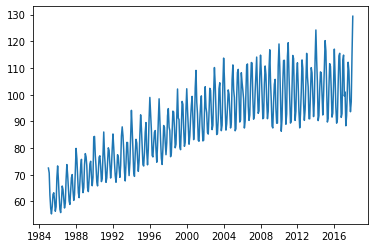

In [0]:
# plotar gráfico de consumo de eletricidade
plt.plot(df.index, df.Value);

### 3. Como decompor uma Time Series em seus componentes

É possível decompor uma série temporal se você considerar a série como uma combinação aditiva ou multiplicativa dos seus componentes.

A biblioteca `stats`
from statsmodels.tsa.seasonal import seasonal_decompose


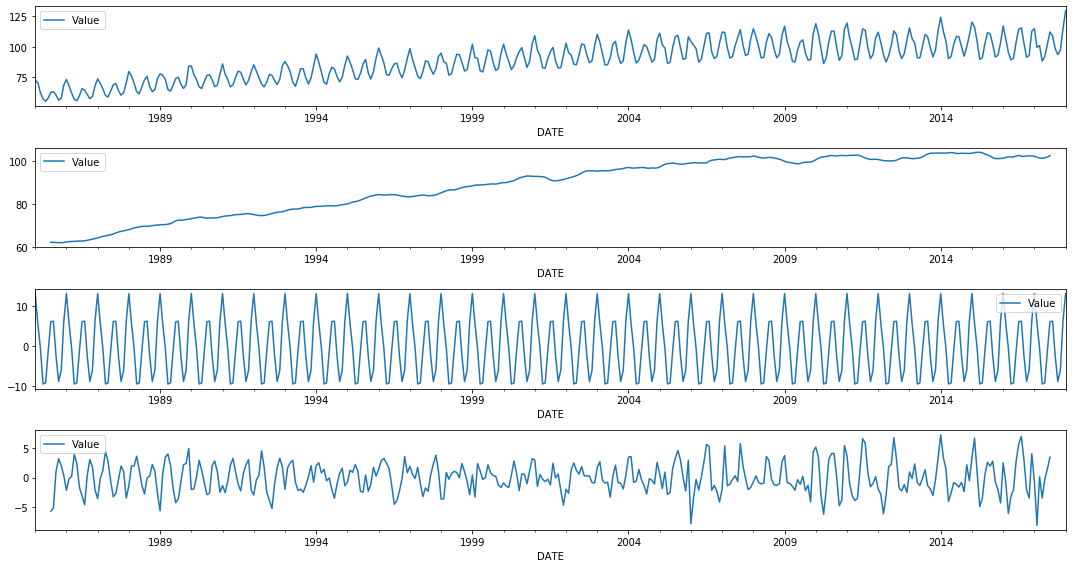

In [0]:
# salvar a decomposicao em result
result = seasonal_decompose(df)

# plotar a decomposicao
#result.plot();

# plotar maior
fig, (ax1,ax2,ax3, ax4) = plt.subplots(4,1, figsize=(15,8))
result.observed.plot(ax=ax1)
result.trend.plot(ax=ax2)
result.seasonal.plot(ax=ax3)
result.resid.plot(ax=ax4)
plt.tight_layout()

### 4. Análise Exploratória e Extração de Features

Usaremos um *dataset* contendo os dados de uma suposta companhia ferroviária que utiliza uma nova tecnologia de propulsão.


In [0]:
ferroviaria_dataset = "https://raw.githubusercontent.com/carlosfab/datasets/master/jetrail/jetrail.csv"

# importar os dados da empresa ferroviária
df_trem = pd.read_csv(ferroviaria_dataset)

# ver as 5 primeiras entradas
df_trem.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


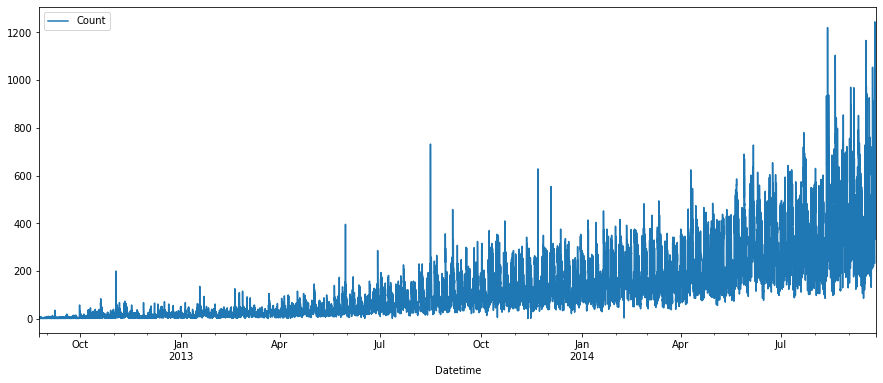

In [0]:
# converter a coluna Datetime em tipo datetime; 
df_trem.Datetime = pd.to_datetime(df_trem.Datetime, format="%d-%m-%Y %H:%M")

# plotar gráfico
fig, ax = plt.subplots(figsize=(15,6))
df_trem.plot(x='Datetime', y='Count', ax=ax);

**Hipóteses:**
* Pessoas viajam mais durante a semana.
* Há horários de pico por causa das indas e vindas do trabalho.
* Há períodos do ano onde a demanda por transporte é maior.

In [0]:
# criar features para cada período
df_trem['year'] = df_trem.Datetime.dt.year
df_trem['month'] = df_trem.Datetime.dt.month
df_trem['day'] = df_trem.Datetime.dt.day
df_trem['hour'] = df_trem.Datetime.dt.hour
df_trem['day_of_week'] = df_trem.Datetime.dt.dayofweek

In [0]:
# verificar as 5 primeiras entradas
df_trem.head()

,ID,Datetime,Count,year,month,day,hour,day_of_week
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5


* Pessoas viajam mais durante a semana

In [0]:
# converter as variáveis em 0 ou 1
df_trem['weekend'] = 0
df_trem.loc[(df_trem.day_of_week == 5) | (df_trem.day_of_week == 6), 'weekend'] = 1

In [0]:
# verificar os valores final de semana x semana
df_trem.weekend.value_counts()

0    13056
1     5232
Name: weekend, dtype: int64

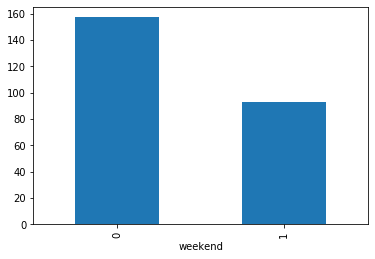

In [0]:
# plotar os valores final de semana x semana
df_trem.groupby('weekend').Count.mean().plot.bar()

* Há horários de pico por causa das indas e vindas do trabalho.

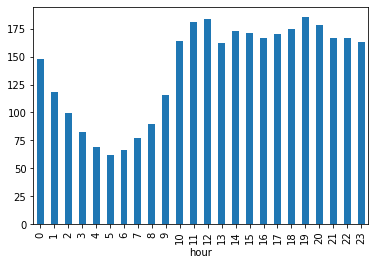

In [0]:
# ver count por horários
df_trem.groupby('hour').Count.mean().plot.bar();

* Há períodos do ano onde a demanda por transporte é maior.

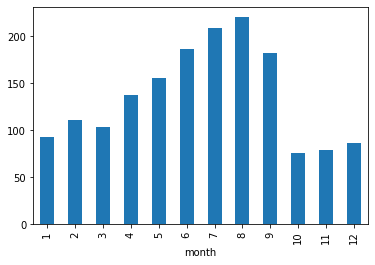

In [0]:
df_trem.groupby('month').Count.mean().plot.bar();